<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [15]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2021-05-22 19:32:19--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  25.3MB/s    in 1.4s    

2021-05-22 19:32:21 (25.3 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



Connect to the database.


In [16]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Demo: How to run an sql query


In [18]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql("SELECT * FROM master", conn)
df.head()

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy


In [19]:
#df.to_csv("m4_survey_data.csv",index=False)
# # print how many rows are there in the table named 'master'
# QUERY = "SELECT *"
# SELECT COUNT(*)
# FROM master
# """

# # the read_sql_query runs the sql query and returns the data as a dataframe
# df = pd.read_sql_query(QUERY,conn)
# df.head()

## Demo: How to list all tables


In [20]:
# # print all the tables names in the database
# QUERY = """
# SELECT name as Table_Name FROM
# sqlite_master WHERE
# type = 'table'
# """
# # the read_sql_query runs the sql query and returns the data as a dataframe
# pd.read_sql_query(QUERY,conn)

## Demo: How to run a group by query


In [21]:
# QUERY = """
# SELECT Age,COUNT(*) as count
# FROM master
# group by age
# order by age
# """
# pd.read_sql_query(QUERY,conn)

## Demo: How to describe a table


In [22]:
# table_name = 'master'  # the table you wish to describe

# QUERY = """
# SELECT sql FROM sqlite_master
# WHERE name= '{}'
# """.format(table_name)

# df = pd.read_sql_query(QUERY,conn)
# print(df.iat[0,0])

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


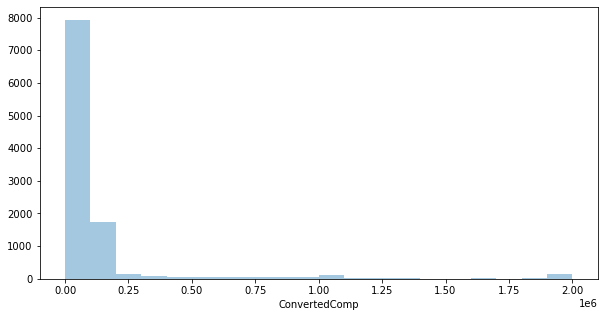

In [23]:
plt.figure(figsize=(10,5))
sns.distplot(a=df["ConvertedComp"],bins=20,kde=False)
plt.show()

### Box Plots


Plot a box plot of `Age.`


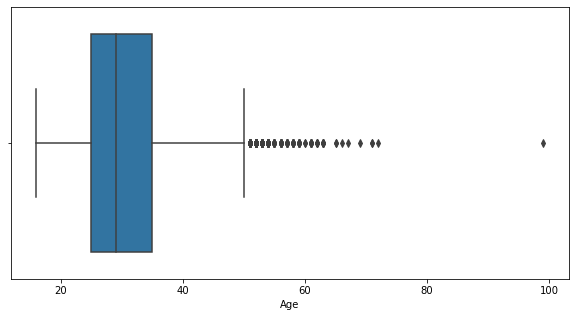

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.Age, data=df)
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


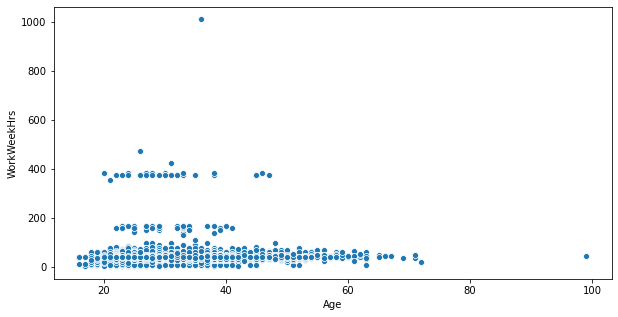

In [25]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df.Age,y=df.WorkWeekHrs, data=df)
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


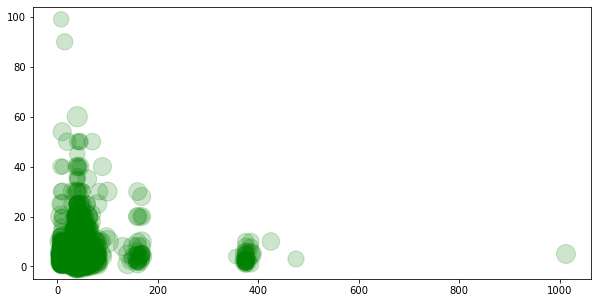

In [26]:
plt.figure(figsize=(10,5))
plt.scatter(x=df.WorkWeekHrs, y=df.CodeRevHrs, c='green', alpha=0.2, s=df.Age*10)
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [27]:
df2 = pd.read_sql("SELECT * FROM DatabaseWorkedWith", conn)
df2.columns

Index(['Respondent', 'DatabaseWorkedWith'], dtype='object')

In [28]:
df2

,Respondent,DatabaseWorkedWith
0,4,MySQL
1,4,SQLite
2,9,DynamoDB
3,9,PostgreSQL
4,9,SQLite
...,...,...
31370,25137,MySQL
31371,25138,PostgreSQL
31372,25141,Microsoft SQL Server
31373,25141,Redis


In [29]:
df2.groupby("Respondent").count()

,DatabaseWorkedWith
Respondent,
4,2
9,3
13,4
16,3
17,2
...,...
25136,1
25137,1
25138,1


In [30]:
df2[df2["DatabaseWorkedWith"].str.contains("SQL")]

,Respondent,DatabaseWorkedWith
0,4,MySQL
1,4,SQLite
3,9,PostgreSQL
4,9,SQLite
8,13,MySQL
...,...,...
31369,25136,Microsoft SQL Server
31370,25137,MySQL
31371,25138,PostgreSQL
31372,25141,Microsoft SQL Server


In [31]:
df2[df2["DatabaseWorkedWith"].str.contains("MySQL")]

,Respondent,DatabaseWorkedWith
0,4,MySQL
8,13,MySQL
11,16,MySQL
17,19,MySQL
24,22,MySQL
...,...,...
31336,25111,MySQL
31342,25120,MySQL
31356,25124,MySQL
31366,25134,MySQL


In [32]:
df2.groupby("DatabaseWorkedWith").count()

,Respondent
DatabaseWorkedWith,
Cassandra,397
Couchbase,250
DynamoDB,831
Elasticsearch,1954
Firebase,1314
MariaDB,1709
Microsoft SQL Server,4110
MongoDB,3016
MySQL,5469


In [33]:
y = pd.DataFrame(df2.groupby("DatabaseWorkedWith").count())
y

,Respondent
DatabaseWorkedWith,
Cassandra,397
Couchbase,250
DynamoDB,831
Elasticsearch,1954
Firebase,1314
MariaDB,1709
Microsoft SQL Server,4110
MongoDB,3016
MySQL,5469


In [34]:
y = pd.DataFrame(df2.groupby("DatabaseWorkedWith").count())
y

,Respondent
DatabaseWorkedWith,
Cassandra,397
Couchbase,250
DynamoDB,831
Elasticsearch,1954
Firebase,1314
MariaDB,1709
Microsoft SQL Server,4110
MongoDB,3016
MySQL,5469


ValueError: 'label' must be of length 'x'

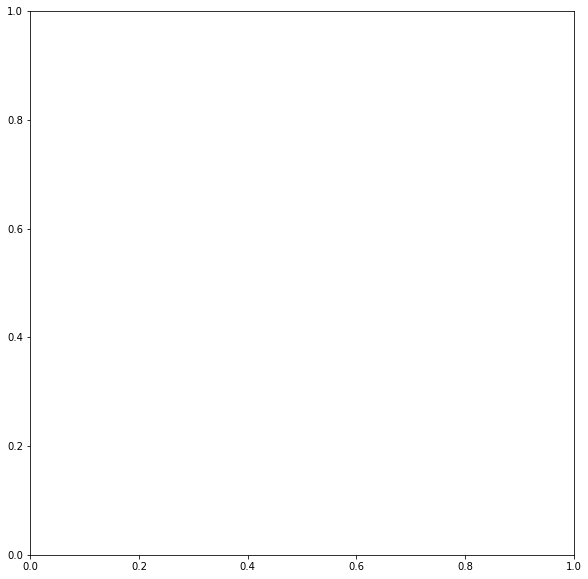

In [35]:
plt.figure(figsize=(10,10))
plt.pie(y.Respondent, labels=['MySQL','Microsoft SQL Server','PostgreSQL','SQLite','MongoDB'],
       autopct='%.2f%%')
plt.title("DataBase Worked With Percentages")
plt.show()

In [36]:
df3 = pd.read_sql("SELECT * FROM DatabaseDesireNextYear", conn)
df3

,Respondent,DatabaseDesireNextYear
0,4,MySQL
1,4,SQLite
2,9,PostgreSQL
3,9,Redis
4,9,SQLite
...,...,...
29570,25141,Elasticsearch
29571,25141,MongoDB
29572,25141,Microsoft SQL Server
29573,25141,Redis


In [37]:
df3.groupby("DatabaseDesireNextYear").count()

,Respondent
DatabaseDesireNextYear,
Cassandra,1003
Couchbase,390
DynamoDB,1044
Elasticsearch,2856
Firebase,1650
MariaDB,1385
Microsoft SQL Server,2706
MongoDB,3649
MySQL,3281


In [38]:
top5desire = pd.DataFrame(df3.groupby("DatabaseDesireNextYear").count())
top5desire = top5desire.nlargest(5,"Respondent")
top5desire

,Respondent
DatabaseDesireNextYear,
PostgreSQL,4328
MongoDB,3649
Redis,3331
MySQL,3281
Elasticsearch,2856


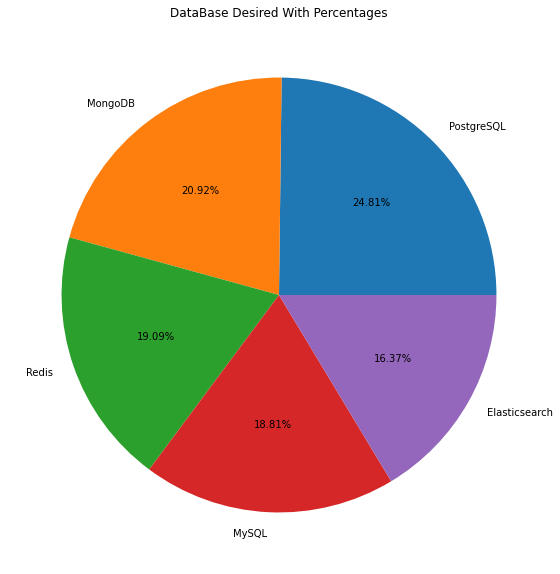

In [39]:
plt.figure(figsize=(10,10))
plt.pie(top5desire.Respondent, labels=['PostgreSQL','MongoDB','Redis','MySQL','Elasticsearch'],
       autopct='%.2f%%')
plt.title("DataBase Desired With Percentages")
plt.show()

In [40]:
df4 = pd.read_sql("SELECT * FROM LanguageDesireNextYear", conn)
df4

,Respondent,LanguageDesireNextYear
0,4,C
1,4,C#
2,4,JavaScript
3,4,SQL
4,9,Bash/Shell/PowerShell
...,...,...
55759,25142,Bash/Shell/PowerShell
55760,25142,C
55761,25142,C++
55762,25142,Python


In [41]:
df4.groupby("LanguageDesireNextYear").count()

,Respondent
LanguageDesireNextYear,
Assembly,336
Bash/Shell/PowerShell,3097
C,1028
C#,3591
C++,1633
Clojure,413
Dart,610
Elixir,620
Erlang,310


In [42]:
top5langdesired = pd.DataFrame(df4.groupby("LanguageDesireNextYear").count())
top5langdesired

,Respondent
LanguageDesireNextYear,
Assembly,336
Bash/Shell/PowerShell,3097
C,1028
C#,3591
C++,1633
Clojure,413
Dart,610
Elixir,620
Erlang,310


In [43]:
top5langdesired.nlargest(5,"Respondent")

,Respondent
LanguageDesireNextYear,
JavaScript,6630
HTML/CSS,5328
Python,5239
SQL,5012
TypeScript,4088


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [44]:
df.WorkWeekHrs.median()

40.0

In [45]:
df.CodeRevHrs.median()

4.0

In [46]:
age = df[(df["Age"] >= 30.0) & (df["Age"] <= 35.0)]
age

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
5,5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,...,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...",Neutral,Just as welcome now as I felt last year,31.0,No,Yes,Too long,Easy
11,11,26,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,Some college/university study without earning ...,...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Just as welcome now as I felt last year,34.0,No,No,Appropriate in length,Easy
12,12,29,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,I have never participated in Q&A on Stack Over...,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Just as welcome now as I felt last year,32.0,No,Yes,Appropriate in length,Easy
18,18,49,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,Serbia,"Yes, full-time",Some college/university study without earning ...,...,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","No, not really",Just as welcome now as I felt last year,34.0,No,Yes,Too long,Easy
22,22,56,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,China,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","No, not at all",Just as welcome now as I felt last year,33.0,No,Yes,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11385,11385,25120,I am a developer by profession,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Argentina,"Yes, part-time","Bachelor’s degree (BA, BS, B.Eng., etc.)",...,I have never participated in Q&A on Stack Over...,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,32.0,No,No,Too long,Neither easy nor difficult
11391,11391,25133,I am a developer by profession,No,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,Belgium,"Yes, full-time","Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,32.0,No,Yes,Too long,Easy
11392,11392,25134,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ecuador,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","No, not really",Somewhat less welcome now than last year,32.0,No,No,Appropriate in length,Easy
11395,11395,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,I have never participated in Q&A on Stack Over...,Yes,"No, I've heard of them, but I am not part of a...",Neutral,A l

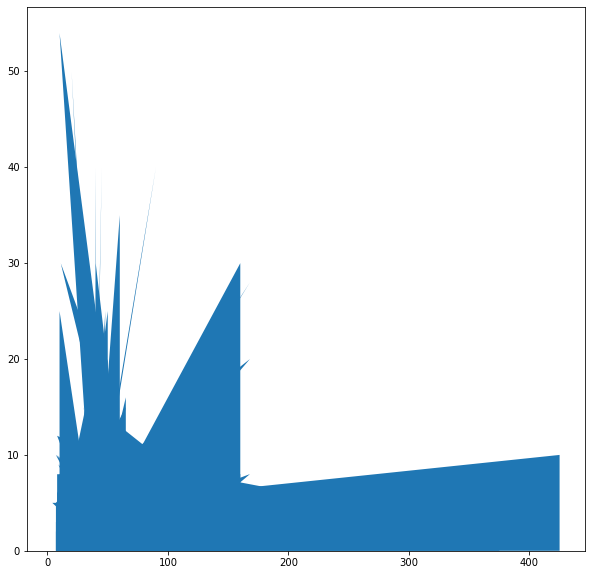

In [47]:
plt.figure(figsize=(10,10))
plt.stackplot(age.WorkWeekHrs, age.CodeRevHrs)
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [48]:
age2 = df[(df["Age"] >= 45.0) & (df["Age"] <= 60.0)]
age2.head()

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
7,7,22,I am a developer by profession,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,Some college/university study without earning ...,...,A few times per week,Yes,"No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,47.0,No,Yes,Appropriate in length,Easy
50,50,111,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Somewhat less welcome now than last year,54.0,No,Yes,Too long,Easy
66,66,144,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed part-time,Germany,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","No, not really",Somewhat less welcome now than last year,47.0,No,Yes,Too long,Easy
75,75,164,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,47.0,No,Yes,Appropriate in length,Easy
93,93,202,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,Canada,No,Some college/university study without earning ...,...,Multiple times per day,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,45.0,No,No,Appropriate in length,Easy


In [49]:
age2.ConvertedComp

7        103000.0
50            NaN
66        54996.0
75        62807.0
93        72522.0
           ...   
11342     76339.0
11345     68705.0
11350    300000.0
11372     87668.0
11373     59652.0
Name: ConvertedComp, Length: 599, dtype: float64

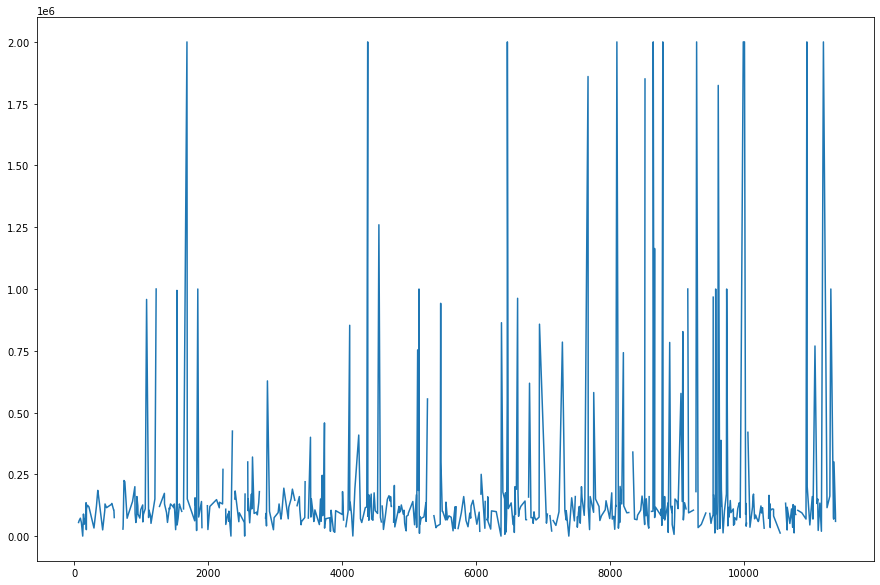

In [50]:
age2.ConvertedComp.plot(figsize=(15,10))
plt.show()

In [51]:
age3 = df[(df["Age"] >= 25.0) & (df["Age"] <= 30.0)]
age3.head()

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy
16,16,43,I am a developer by profession,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Spain,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per month or weekly,Yes,"No, I've heard of them, but I am not part of a...","Yes, definitely",Just as welcome now as I felt last year,27.0,No,No,Too long,Easy
24,24,60,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Secondary school (e.g. American high school, G...",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",None,27.0,No,No,None,None


In [52]:
age3.corr()

,index,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
index,1.000000,0.999986,-0.006388,-0.009846,-0.020447,0.009425,-0.032681
Respondent,0.999986,1.000000,-0.006372,-0.009896,-0.020417,0.009408,-0.032737
CompTotal,-0.006388,-0.006372,1.000000,-0.038303,0.005858,0.059443,0.009916
ConvertedComp,-0.009846,-0.009896,-0.038303,1.000000,0.013088,-0.047301,0.062712
WorkWeekHrs,-0.020447,-0.020417,0.005858,0.013088,1.000000,0.009816,0.023208
CodeRevHrs,0.009425,0.009408,0.059443,-0.047301,0.009816,1.000000,-0.003608
Age,-0.032681,-0.032737,0.009916,0.062712,0.023208,-0.003608,1.000000


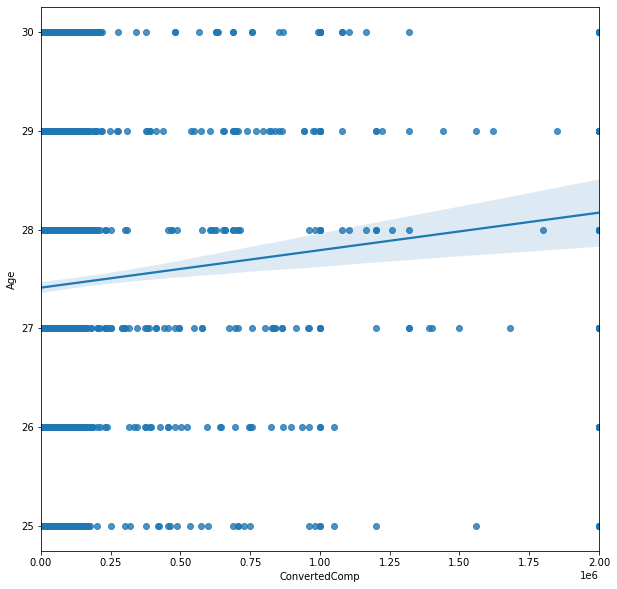

In [53]:
plt.figure(figsize=(10,10))
sns.regplot(x=age3.ConvertedComp,y=age3.Age)
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [54]:
df.MainBranch.value_counts()

I am a developer by profession                                                   10618
I am not primarily a developer, but I write code sometimes as part of my work      780
Name: MainBranch, dtype: int64

In [55]:
z = pd.DataFrame(df.MainBranch.value_counts())
z

,MainBranch
I am a developer by profession,10618
"I am not primarily a developer, but I write code sometimes as part of my work",780


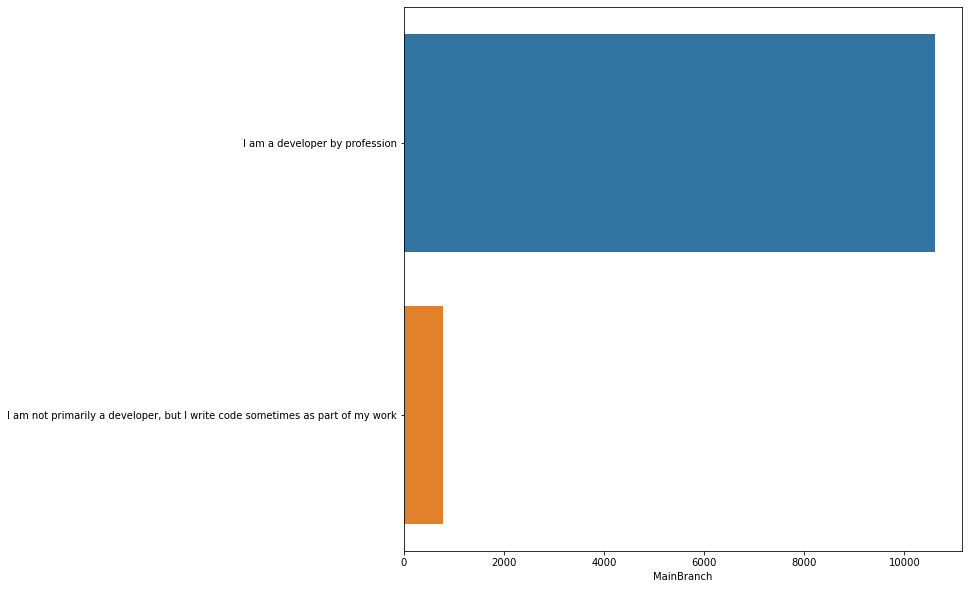

In [56]:
plt.figure(figsize=(10,10))
sns.barplot(x=z.MainBranch,y=z.index, orient='h')
plt.show()

In [57]:
df5 = pd.read_sql("SELECT * FROM DevType", conn)
df5

,Respondent,DevType
0,4,"Developer, full-stack"
1,9,Database administrator
2,9,"Developer, back-end"
3,9,"Developer, front-end"
4,9,"Developer, full-stack"
...,...,...
35309,25141,"Developer, mobile"
35310,25141,"Engineer, data"
35311,25141,"Engineer, site reliability"
35312,25141,System administrator


In [58]:
df5[df5["DevType"].str.contains("full-stack", regex=False)]

,Respondent,DevType
0,4,"Developer, full-stack"
4,9,"Developer, full-stack"
12,13,"Developer, full-stack"
20,16,"Developer, full-stack"
23,17,"Developer, full-stack"
...,...,...
35261,25122,"Developer, full-stack"
35269,25133,"Developer, full-stack"
35279,25134,"Developer, full-stack"
35292,25136,"Developer, full-stack"


In [59]:
df5[df5["DevType"].str.contains("back-end")]

,Respondent,DevType
2,9,"Developer, back-end"
9,13,"Developer, back-end"
21,17,"Developer, back-end"
28,20,"Developer, back-end"
36,22,"Developer, back-end"
...,...,...
35276,25134,"Developer, back-end"
35289,25136,"Developer, back-end"
35296,25137,"Developer, back-end"
35298,25138,"Developer, back-end"


In [60]:
df5[df5["DevType"].str.contains("front-end")]

,Respondent,DevType
3,9,"Developer, front-end"
11,13,"Developer, front-end"
22,17,"Developer, front-end"
30,20,"Developer, front-end"
38,22,"Developer, front-end"
...,...,...
35256,25120,"Developer, front-end"
35262,25123,"Developer, front-end"
35278,25134,"Developer, front-end"
35291,25136,"Developer, front-end"


In [61]:
df5[df5["DevType"].str.contains("Developer, mobile")]

,Respondent,DevType
13,13,"Developer, mobile"
32,20,"Developer, mobile"
54,26,"Developer, mobile"
72,43,"Developer, mobile"
104,61,"Developer, mobile"
...,...,...
35253,25118,"Developer, mobile"
35263,25124,"Developer, mobile"
35265,25128,"Developer, mobile"
35280,25134,"Developer, mobile"


Close the database connection.


In [62]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
